In [33]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from numpy import set_printoptions
from sklearn import preprocessing

In [34]:
# Loading data
# Note that data was modified in excel to make the features 'Previous CTC' and 'CTC' floats as they were previosly strings
data = pd.read_csv('D:/DATA SCIENCE/STARTECH ACADEMY/MACHINE LEARNING/Data_file.csv')

In [35]:
# Eyeballing the data

data
# The column 'S.No' is definitely irrelevant

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58
1,2,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87
2,3,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02
3,4,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39
4,5,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...,...
1333,1334,Tier 3,Executive,Metro,59661.0,4,68,50,69712.40
1334,1335,Tier 1,Executive,Non-Metro,53714.0,1,67,18,69298.75
1335,1336,Tier 2,Executive,Non-Metro,61957.0,1,47,18,66397.77
1336,1337,Tier 1,Executive,Non-Metro,53203.0,3,69,21,64044.38


In [36]:
# Checking the shape of the data

data.shape
# The data has 8 relevant features and 1338 samples

(1338, 9)

In [37]:
# Dropping the irrelevant feature 'S.No.'

data1 = data.drop(['S.No.'], axis=1)

data1

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58
1,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87
2,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02
3,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39
4,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661.0,4,68,50,69712.40
1334,Tier 1,Executive,Non-Metro,53714.0,1,67,18,69298.75
1335,Tier 2,Executive,Non-Metro,61957.0,1,47,18,66397.77
1336,Tier 1,Executive,Non-Metro,53203.0,3,69,21,64044.38


In [38]:
# Checking the data types of each feature
data1.info()
# There are no missing values
# There are 3 relevant integers features, 2 floating point feature and 3 String features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   float64
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [39]:
# Checking the summary statistics of the data

data1.describe()
# The feature 'Previous job changes' appears slightly skewed to the left
# The other 3 features appear normally distributed

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.339036
std,6685.600553,1.123502,14.894696,14.049960,12551.280147
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50547.000000,2.000000,47.000000,27.000000,66905.067500
50%,55293.500000,3.000000,60.000000,39.000000,73112.640000
75%,60150.500000,4.000000,73.000000,51.000000,80747.175000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


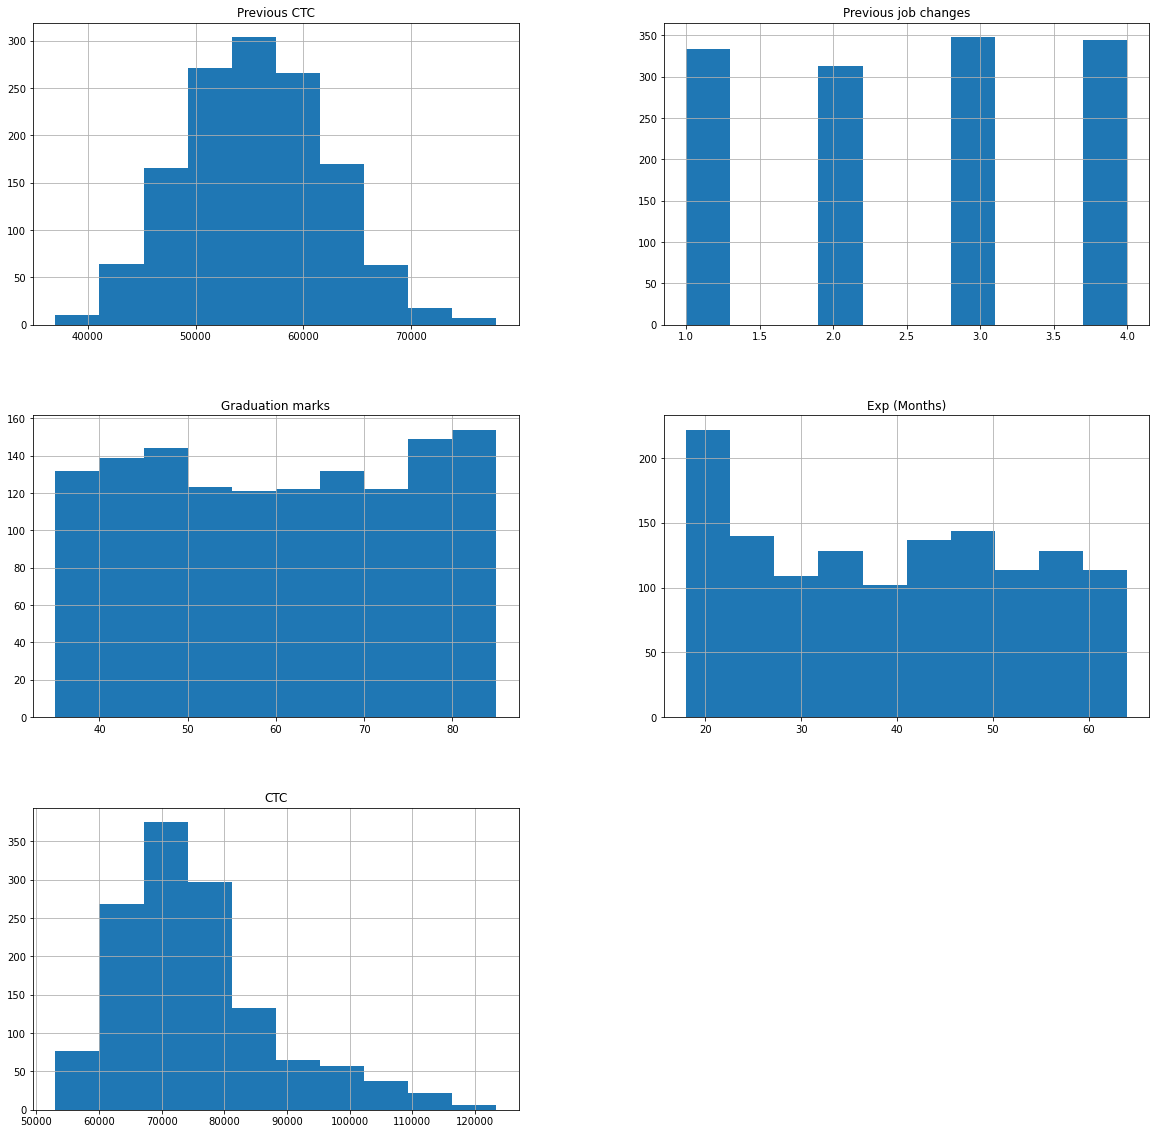

In [40]:
# Visualizing the integer features of the data

data1.hist()
plt.gcf().set_size_inches(20,20)

# There is also data inbalance with respect to number of Executives (1000+) and Managers (200+)

<AxesSubplot:>

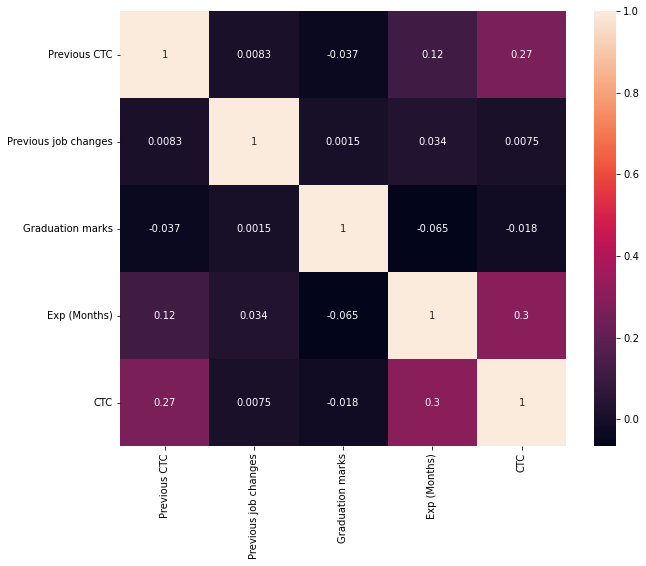

In [41]:
# Checking for multicolinearity in the data using pearsons correlation

set_option('display.width', 200)
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(), annot=True)

# There appears no serious multicolinearinty in the data



In [42]:
# Checking the number of unique values in all the features especially the categorical features

data1.nunique()

# The feature 'College' has 3 unique values
# (We use onehot Encoding to change them to integers)

# The features 'Role' and 'City type' have only 2 unique values
# (We use onehot encoding to convert them to binary)

College                    3
Role                       2
City type                  2
Previous CTC            1308
Previous job changes       4
Graduation marks          51
Exp (Months)              47
CTC                     1338
dtype: int64

In [43]:
data1.shape

(1338, 8)

In [79]:
data1

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58
1,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87
2,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02
3,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39
4,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661.0,4,68,50,69712.40
1334,Tier 1,Executive,Non-Metro,53714.0,1,67,18,69298.75
1335,Tier 2,Executive,Non-Metro,61957.0,1,47,18,66397.77
1336,Tier 1,Executive,Non-Metro,53203.0,3,69,21,64044.38


In [45]:
# Converting categorical features to numerical for 'Role' and 'City type'

data6 = pd.get_dummies(data1, columns=['College', 'Role', 'City type'], prefix=['College', 'Role', 'City type'])
data6

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,55523.0,3,66,19,71406.58,1,0,0,0,1,0,1
1,57081.0,1,84,18,68005.87,0,1,0,1,0,1,0
2,60347.0,2,52,28,76764.02,0,1,0,1,0,1,0
3,49010.0,2,81,33,82092.39,0,0,1,1,0,1,0
4,57879.0,4,74,32,73878.10,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,59661.0,4,68,50,69712.40,0,0,1,1,0,1,0
1334,53714.0,1,67,18,69298.75,1,0,0,1,0,0,1
1335,61957.0,1,47,18,66397.77,0,1,0,1,0,0,1
1336,53203.0,3,69,21,64044.38,1,0,0,1,0,0,1


In [46]:
# Creating data frame for prediction of CTC

'''df1 = data6'''
data6_CTC = data6['CTC']
data6_NoCTC = data6.drop(['CTC'], axis = 1)
data7 = pd.concat([data6_NoCTC, data6_CTC], axis = 1)
data7

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro,CTC
0,55523.0,3,66,19,1,0,0,0,1,0,1,71406.58
1,57081.0,1,84,18,0,1,0,1,0,1,0,68005.87
2,60347.0,2,52,28,0,1,0,1,0,1,0,76764.02
3,49010.0,2,81,33,0,0,1,1,0,1,0,82092.39
4,57879.0,4,74,32,0,0,1,1,0,1,0,73878.10
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,59661.0,4,68,50,0,0,1,1,0,1,0,69712.40
1334,53714.0,1,67,18,1,0,0,1,0,0,1,69298.75
1335,61957.0,1,47,18,0,1,0,1,0,0,1,66397.77
1336,53203.0,3,69,21,1,0,0,1,0,0,1,64044.38


In [47]:
# Linear Regression using statsmodels

import statsmodels.api as sn

X_multi = data7.drop('CTC', axis=1)
Y_multi = data7['CTC']
X_multi_cons = sn.add_constant(X_multi)
lm_multi = sn.OLS(Y_multi, X_multi_cons)
lm = lm_multi.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     257.9
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          4.44e-264
Time:                        22:04:05   Log-Likelihood:                -13899.
No. Observations:                1338   AIC:                         2.782e+04
Df Residuals:                    1329   BIC:                         2.786e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.947e+04 

In [48]:
lm.rsquared

0.6081873190299324

In [74]:
# Linear Regression usins sklearn

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


array = data7.values
X= array[:,0:11]
Y = array[:,11]
Kfold = KFold(n_splits=10, shuffle=True, random_state=7)

# 1. Linear Regression
model = LinearRegression()
scoring = "neg_mean_squared_error"
results = cross_val_score(model, X, Y, cv=Kfold, scoring=scoring)
score = np.mean(results)
print(results, score)

model.fit(X,Y)

[-62023185.54603464 -61037999.1425619  -72187147.22110726
 -57532618.26019256 -58424729.14463777 -55621835.33173061
 -63129155.48640124 -69188283.32192814 -63385571.24369223
 -66307304.68510107] -62883782.93833874


LinearRegression()

In [78]:
# Showing model coefficient, intercept, and Score

feature_cols = ['Previous CTC', 'Previous job changes', 'Graduation marks', 'Exp (Months)', 'College_Tier 1',\
                'College_Tier 2', 'College_Tier 3', 'Role_Executive', 'Role_Manager', 'City type_Metro', 'City type_Non-Metro']

print(list(zip(feature_cols, model.coef_)))
print('Intercept: ', model.intercept_,',', 'Model Score: ', model.score(X,Y))

[('Previous CTC', 0.45159315845246306), ('Previous job changes', -29.041199354641606), ('Graduation marks', -3.6523550330415824), ('Exp (Months)', 258.9406419001402), ('College_Tier 1', 3383.9125156185714), ('College_Tier 2', -2108.093476423862), ('College_Tier 3', -1275.8190391947032), ('Role_Executive', -9679.971836691706), ('Role_Manager', 9679.971836691708), ('City type_Metro', 2040.2886485547515), ('City type_Non-Metro', -2040.288648554751)]
Intercept:  45434.8419177538 , Model Score:  0.6081873190299324


In [51]:
# importing the test data to perform prediction
# Note that irrelevant columns have been dropped in Excel

test = pd.read_csv('D:/DATA SCIENCE/STARTECH ACADEMY/MACHINE LEARNING/Test_data_file.csv')
pd.set_option('display.max_columns', None)
test

,College,Role,City type,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.57653
1,Tier 2,Executive,Metro,57081,1,84,18,68005.87063
2,Tier 2,Executive,Metro,60347,2,52,28,76764.02028
3,Tier 3,Executive,Metro,49010,2,81,33,82092.38688
4,Tier 3,Executive,Metro,57879,4,74,32,73878.09773
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50,69712.40366
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.75010
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.77069
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.38295


In [52]:
# Converting categorical features to numerical for 'College', 'Role' and 'City type'

test1 = pd.get_dummies(test, columns=['College', 'Role', 'City type'], prefix=['College', 'Role', 'City type'])
test1

,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,55523,3,66,19,71406.57653,1,0,0,0,1,0,1
1,57081,1,84,18,68005.87063,0,1,0,1,0,1,0
2,60347,2,52,28,76764.02028,0,1,0,1,0,1,0
3,49010,2,81,33,82092.38688,0,0,1,1,0,1,0
4,57879,4,74,32,73878.09773,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,69712.40366,0,0,1,1,0,1,0
1334,53714,1,67,18,69298.75010,1,0,0,1,0,0,1
1335,61957,1,47,18,66397.77069,0,1,0,1,0,0,1
1336,53203,3,69,21,64044.38295,1,0,0,1,0,0,1


In [53]:
# Creating data frame for testing of Predicted CTC

'''df1 = data6'''
test1_CTC = test1['Actual CTC']
test1_NoCTC = test1.drop(['Actual CTC'], axis = 1)
test2 = pd.concat([test1_NoCTC, test1_CTC], axis = 1)
test2

,previous CTC,previous job changes,Graduation marks,Exp,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro,Actual CTC
0,55523,3,66,19,1,0,0,0,1,0,1,71406.57653
1,57081,1,84,18,0,1,0,1,0,1,0,68005.87063
2,60347,2,52,28,0,1,0,1,0,1,0,76764.02028
3,49010,2,81,33,0,0,1,1,0,1,0,82092.38688
4,57879,4,74,32,0,0,1,1,0,1,0,73878.09773
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,0,0,1,1,0,1,0,69712.40366
1334,53714,1,67,18,1,0,0,1,0,0,1,69298.75010
1335,61957,1,47,18,0,1,0,1,0,0,1,66397.77069
1336,53203,3,69,21,1,0,0,1,0,0,1,64044.38295


In [54]:
# Splitting data frame for testing

array1 = test2.values
x_test1 = array1[:,0:11]
y_test1 = array1[:,11]

In [55]:
# Splitting data to perform prediction

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_multi, Y_multi, test_size = 0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

lm_a = LinearRegression()
lm_a.fit(x_train, y_train)

(1070, 11) (268, 11) (1070,) (268,)


LinearRegression()

In [56]:
# Predicting using the splitted test values

y_test2 = lm_a.predict(x_test)
len(y_test2)

268

In [57]:
# Showing the score of the predicted splitted test data

from sklearn.metrics import r2_score
r2_score(y_test, y_test2)

0.6708423527620605

In [58]:
# Performing prediction on the given project test data

y_pred = lm_a.predict(x_test1)


C:\Users\OLISAEMEKA\anaconda3a\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
# Showing predicted results

y_pred

array([85884.07068471, 66228.82627483, 70350.95251879, ...,
       64478.7990589 , 66212.51017759, 90514.49944311])

In [60]:
# Confirming length of predicted results

len(y_pred)

1338

In [61]:
# Converting the predicted result array to dataframe

predicted = pd.DataFrame(y_pred, columns = ['Predicted CTC'])
predicted

,Predicted CTC
0,85884.070685
1,66228.826275
2,70350.952519
3,66973.793519
4,70601.710095
...,...
1333,76000.820703
1334,65976.139029
1335,64478.799059
1336,66212.510178


In [62]:
# Adding the predicted results to the test data frame

test_predict = pd.concat([test2, predicted], axis=1)
test_predict

,previous CTC,previous job changes,Graduation marks,Exp,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro,Actual CTC,Predicted CTC
0,55523,3,66,19,1,0,0,0,1,0,1,71406.57653,85884.070685
1,57081,1,84,18,0,1,0,1,0,1,0,68005.87063,66228.826275
2,60347,2,52,28,0,1,0,1,0,1,0,76764.02028,70350.952519
3,49010,2,81,33,0,0,1,1,0,1,0,82092.38688,66973.793519
4,57879,4,74,32,0,0,1,1,0,1,0,73878.09773,70601.710095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,0,0,1,1,0,1,0,69712.40366,76000.820703
1334,53714,1,67,18,1,0,0,1,0,0,1,69298.75010,65976.139029
1335,61957,1,47,18,0,1,0,1,0,0,1,66397.77069,64478.799059
1336,53203,3,69,21,1,0,0,1,0,0,1,64044.38295,66212.510178


In [63]:
# Showing the score of the predicted test data

from sklearn.metrics import r2_score
r2_score(y_test1, y_pred)

0.6078642435815582

In [64]:
from sklearn import metrics

print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test1, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test1, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

Mean Absolute Error =  6166.606572432847
Mean Squared Error =  61728794.10974753
Root Mean Squared Error =  7856.767408403251
